In [6]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import cifar10
from keras.utils import load_img, img_to_array
from sklearn.model_selection import train_test_split
import os

# Load CIFAR-10 dataset (common objects)
(x_train, _), (x_test, _) = cifar10.load_data()

# Normalize the image data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Train-test split for validation
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42)

# Define the autoencoder model
model = Sequential([
    # Encoder
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(255, 255, 3)),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'), 

    # Decoder
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(3, (3, 3), activation='sigmoid', padding='same')
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, x_train, epochs=20, batch_size=128, validation_data=(x_val, x_val), verbose=1)

# Evaluate on test set
loss = model.evaluate(x_test, x_test)
print(f"Test loss: {loss}")

/Users/daryl/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 91s 285ms/step - loss: 0.0207 - val_loss: 0.0061
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 84s 268ms/step - loss: 0.0058 - val_loss: 0.0051
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 92s 294ms/step - loss: 0.0050 - val_loss: 0.0047
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 258ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 87s 280ms/step - loss: 0.0041 - val_loss: 0.0038
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 262ms/step - loss: 0.0039 - val_loss: 0.0035
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 94s 300ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 98s 313ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 9/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 88s 281ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 10/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 261ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 11/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 94s 302ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 12/20
313/313

In [8]:
model.save("autoencoder_model.keras")

In [9]:
from PIL import Image

In [10]:
def apply_xray_effect_from_autoencoder(image_path, save_path=None):
    image = load_img(image_path, target_size=(255, 255))
    image_array = img_to_array(image).astype('float32') / 255
    image_array = np.expand_dims(image_array, axis=0)  # Reshape for model input

    # Pass the image through the encoder layers only
    encoder_model = Sequential(model.layers[:4])  # Select encoder layers
    encoded_image = encoder_model.predict(image_array)

    # Modify encoded image to create an X-ray effect (invert colors)
    xray_effect = 1 - encoded_image  # Invert the intensities

    # Pass the modified encoded image through the decoder
    decoder_model = Sequential(model.layers[4:])  # Select decoder layers
    xray_image = decoder_model.predict(xray_effect)

    # Plot original and X-ray effect images
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image_array[0])
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("X-ray Effect Image")
    plt.imshow(xray_image[0])
    plt.axis('off')

    plt.show()

    # Save the X-ray effect image if save_path is provided
    if save_path:
        xray_image = (xray_image[0] * 255).astype('uint8')
        img = Image.fromarray(xray_image)
        img.save(save_path)
        print(f"X-ray effect image saved at: {save_path}")

In [14]:
def apply_grayscale_filter_from_autoencoder(image_path, save_path=None):
    # Load the image
    image = load_img(image_path, target_size=(255,255))
    image_array = img_to_array(image).astype('float32') / 255  # Normalize image
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    
    # Pass the image through the encoder layers only
    encoder_model = Sequential(model.layers[:4])  # Select encoder layers
    encoded_image = encoder_model.predict(image_array)

    # Pass the encoded image through the decoder
    decoder_model = Sequential(model.layers[4:])  # Select decoder layers
    decoded_image = decoder_model.predict(encoded_image)

    # Convert the decoded image to grayscale using the standard formula
    grayscale_image = np.dot(decoded_image[0][..., :3], [0.299, 0.587, 0.114])  # Weighted sum of RGB channels
    grayscale_image = np.expand_dims(grayscale_image, axis=-1)  # Add the grayscale channel back

    # Plot original and grayscale images
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image_array[0])  # Show original input image
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Grayscale Filtered Image")
    plt.imshow(grayscale_image, cmap='gray')  # Show grayscale image
    plt.axis('off')

    plt.show()

    # Save the grayscale image if save_path is provided
    if save_path:
        grayscale_image = (grayscale_image * 255).astype('uint8')  # Convert back to 0-255 range
        img = Image.fromarray(grayscale_image)
        img.save(save_path)
        print(f"Grayscale-filtered image saved at: {save_path}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


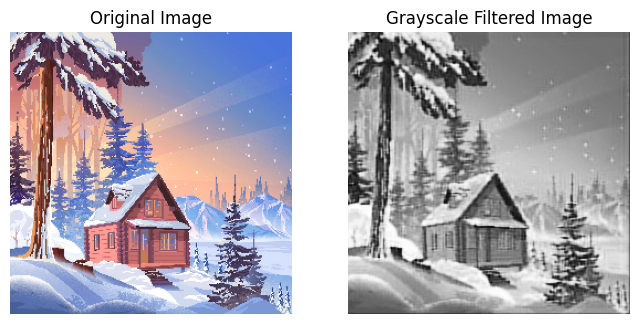

TypeError: Cannot handle this data type: (1, 1, 1), |u1

In [15]:
apply_grayscale_filter_from_autoencoder('2044.jpg', 'xray.jpg')

In [ ]:
apply_xray_effect_from_autoencoder('2044.jpg', 'xray.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


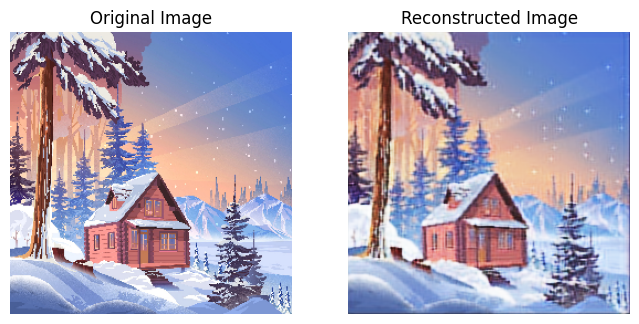

Reconstructed image saved at: new.jpg


In [17]:
def compress_and_reconstruct(image_path, save_path=None):
    image = load_img(image_path, target_size=(255, 255))
    image_array = img_to_array(image).astype('float32') / 255
    image_array = np.expand_dims(image_array, axis=0)  # Reshape for model input

    # Compress and reconstruct
    reconstructed = model.predict(image_array)

    # Plot original and reconstructed images
    plt.figure(figsize=(8, 4))
    
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image_array[0])
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Reconstructed Image")
    plt.imshow(reconstructed[0])
    plt.axis('off')

    plt.show()

    # Save the reconstructed image if save_path is provided
    if save_path:
        reconstructed_image = (reconstructed[0] * 255).astype('uint8')
        img = Image.fromarray(reconstructed_image)
        img.save(save_path)
        print(f"Reconstructed image saved at: {save_path}")



compress_and_reconstruct('2044.jpg', 'new.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


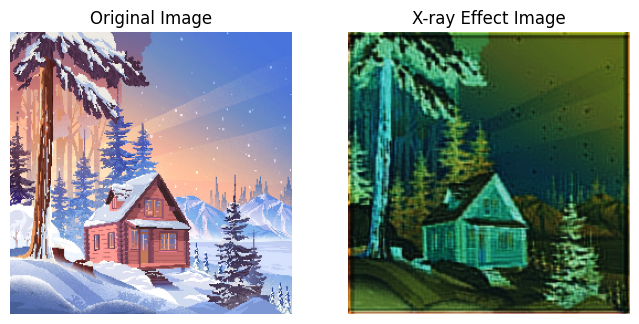

X-ray effect image saved at: xray.jpg


In [18]:
apply_xray_effect_from_autoencoder('2044.jpg', 'xray.jpg')

In [19]:
def apply_noise_effect_from_autoencoder(image_path, save_path=None):
    image = load_img(image_path, target_size=(255,255))
    image_array = img_to_array(image).astype('float32') / 255
    image_array = np.expand_dims(image_array, axis=0)  # Reshape for model input

    # Add random noise to the image
    noise = np.random.normal(loc=0.0, scale=0.1, size=image_array.shape)
    noisy_image = np.clip(image_array + noise, 0, 1)  # Ensure values are in range [0, 1]

    # Pass the noisy image through the autoencoder
    reconstructed_image = model.predict(noisy_image)

    # Plot original, noisy, and reconstructed images
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(image_array[0])
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Noisy Image")
    plt.imshow(noisy_image[0])
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Reconstructed Image")
    plt.imshow(reconstructed_image[0])
    plt.axis('off')

    plt.show()

    # Save the reconstructed image if save_path is provided
    if save_path:
        reconstructed_image = (reconstructed_image[0] * 255).astype('uint8')
        img = Image.fromarray(reconstructed_image)
        img.save(save_path)
        print(f"Reconstructed image saved at: {save_path}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


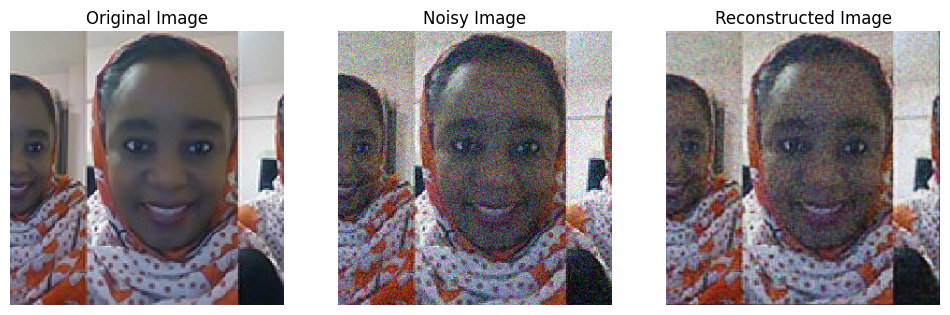

Reconstructed image saved at: new.jpg


In [19]:
apply_noise_effect_from_autoencoder('2044.jpg','new.jpg')

In [20]:
def apply_red_filter_from_autoencoder(image_path, save_path=None):
    # Load the image
    image = load_img(image_path, target_size=(255,255))
    image_array = img_to_array(image).astype('float32') / 255  # Normalize image
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    
    # Pass the image through the encoder layers only
    encoder_model = Sequential(model.layers[:4])  # Select encoder layers
    encoded_image = encoder_model.predict(image_array)

    # Pass the encoded image through the decoder
    decoder_model = Sequential(model.layers[4:])  # Select decoder layers
    decoded_image = decoder_model.predict(encoded_image)

    # Apply a red filter by keeping the red channel and zeroing out others
    filtered_image = decoded_image[0].copy()  # Take the first (and only) image in the batch
    filtered_image[..., 1] = 0  # Zero out green channel
    filtered_image[..., 2] = 0  # Zero out blue channel

    # Plot original and red-filtered images
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image_array[0])  # Show original input image
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Red Filtered Image")
    plt.imshow(filtered_image)  # Show red-filtered output image
    plt.axis('off')

    plt.show()

    # Save the red-filtered image if save_path is provided
    if save_path:
        filtered_image = (filtered_image * 255).astype('uint8')  # Convert back to 0-255 range
        img = Image.fromarray(filtered_image)
        img.save(save_path)
        print(f"Red-filtered image saved at: {save_path}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


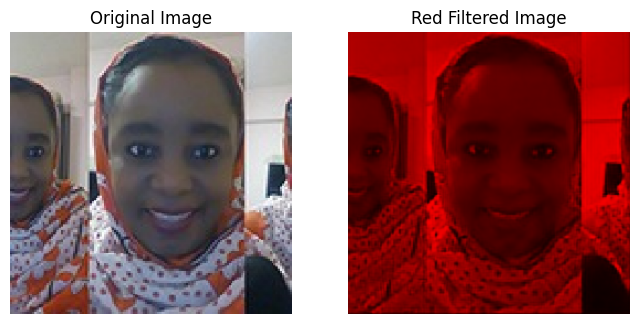

Red-filtered image saved at: new.jpg


In [11]:
apply_red_filter_from_autoencoder('2044.jpg','new.jpg')

In [21]:
def apply_rgb_split_from_autoencoder(image_path, save_path=None):
    # Load the image
    image = load_img(image_path, target_size=(255,255))
    image_array = img_to_array(image).astype('float32') / 255  # Normalize image
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    
    # Pass the image through the encoder layers only
    encoder_model = Sequential(model.layers[:4])  # Select encoder layers
    encoded_image = encoder_model.predict(image_array)

    # Pass the encoded image through the decoder
    decoder_model = Sequential(model.layers[4:])  # Select decoder layers
    decoded_image = decoder_model.predict(encoded_image)

    # Apply RGB split filter: 1/3 Red, 1/3 Green, 1/3 Blue
    filtered_image = decoded_image[0].copy()  # Take the first (and only) image in the batch
    
    # Get image dimensions
    height, width, _ = filtered_image.shape
    
    # Divide the image into thirds for red, green, and blue
    # Left third - Red channel
    filtered_image[:, :width // 3, 1:] = 0  # Zero out green and blue in left third (Red)
    
    # Middle third - Green channel
    filtered_image[:, width // 3:2 * (width // 3), ::2] = 0  # Zero out red and blue in middle third (Green)
    
    # Right third - Blue channel
    filtered_image[:, 2 * (width // 3):, :2] = 0  # Zero out red and green in right third (Blue)

    # Plot original and RGB-split images
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image_array[0])  # Show original input image
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("RGB Split Image")
    plt.imshow(filtered_image)  # Show RGB-split output image
    plt.axis('off')

    plt.show()

    # Save the RGB-split image if save_path is provided
    if save_path:
        filtered_image = (filtered_image * 255).astype('uint8')  # Convert back to 0-255 range
        img = Image.fromarray(filtered_image)
        img.save(save_path)
        print(f"RGB-split image saved at: {save_path}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


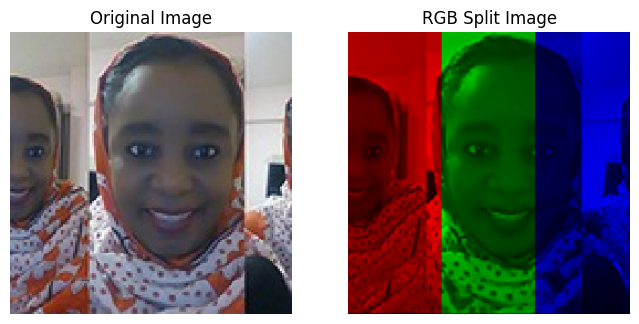

RGB-split image saved at: new.jpg


In [13]:
apply_rgb_split_from_autoencoder('2044.jpg','new.jpg')

In [15]:
def apply_swirl_effect(image_path, save_path=None, swirl_strength=5, swirl_radius=50):
    # Load the image
    image = load_img(image_path, target_size=(255, 255))
    image_array = img_to_array(image).astype('float32') / 255  # Normalize image
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    
    # Pass the image through the encoder layers only
    encoder_model = Sequential(model.layers[:4])  # Select encoder layers
    encoded_image = encoder_model.predict(image_array)

    # Pass the encoded image through the decoder
    decoder_model = Sequential(model.layers[4:])  # Select decoder layers
    decoded_image = decoder_model.predict(encoded_image)

    # Convert the decoded image to a NumPy array for manipulation
    img = decoded_image[0]
    
    # Apply swirl distortion
    swirl_img = apply_swirl(img, swirl_strength, swirl_radius)

    # Plot original and swirled images
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(img)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Swirled Image")
    plt.imshow(swirl_img)
    plt.axis('off')

    plt.show()

    # Save the swirled image if save_path is provided
    if save_path:
        swirl_img = (swirl_img * 255).astype('uint8')  # Convert back to 0-255 range
        img = Image.fromarray(swirl_img)
        img.save(save_path)
        print(f"Swirled image saved at: {save_path}")


def apply_swirl(image, strength=5, radius=50):
    # Get image dimensions
    height, width, _ = image.shape
    
    # Create meshgrid of pixel coordinates
    y, x = np.meshgrid(np.arange(height), np.arange(width), indexing='ij')
    
    # Normalize pixel coordinates to [0, 1] range
    x = (x - width / 2) / width
    y = (y - height / 2) / height
    
    # Calculate the angle based on the distance from the center (radius)
    angle = strength * np.sqrt(x**2 + y**2)  # Adjust the strength for the swirl effect
    
    # Apply the swirl by rotating the coordinates
    new_x = np.cos(angle) * x - np.sin(angle) * y
    new_y = np.sin(angle) * x + np.cos(angle) * y
    
    # Map the swirled coordinates back to pixel values
    new_x = (new_x * width + width / 2).astype(np.int32)
    new_y = (new_y * height + height / 2).astype(np.int32)
    
    # Clip values to be within image dimensions
    new_x = np.clip(new_x, 0, width - 1)
    new_y = np.clip(new_y, 0, height - 1)
    
    # Create the swirled image by re-sampling the original image using the new coordinates
    swirl_image = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            swirl_image[i, j] = image[new_y[i, j], new_x[i, j]]
    
    return swirl_image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


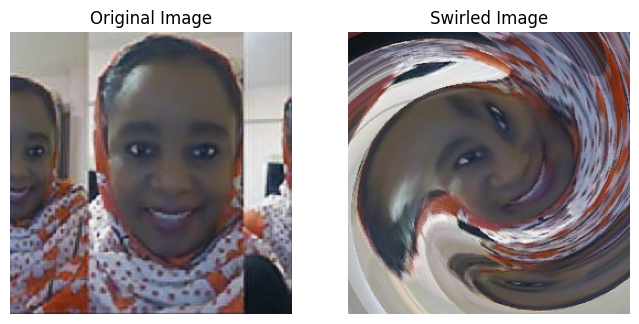

Swirled image saved at: new.jpg


In [16]:
apply_swirl_effect('2044.jpg','new.jpg')